## 第05天：Opencv常用模块实例解读（1）
### 图像阈值
### 图像平滑
### 高斯与中值滤波
## 第05天：Opencv常用模块实例解读（2）
### Canny边缘检测流程
### 非极大值抑制
### 边缘检测效果
## 第05天：Opencv常用模块实例解读（2）
### 1-图像金字塔定义
### 2-金字塔制作方法
### 3-轮廓检测方法
### 4-轮廓检测结果
### 5-轮廓特征与近似
### 6-模板匹配方法
### 7-匹配效果展示

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cv_show(*img_path):
    res = np.hstack(img_path)
    cv2.imshow('img', res)
    cv2.waitKey(0)    
    cv2.destroyAllWindows() 
def plt_show(*args):
    for ttt in range(len(args)):
        img=args[ttt]
        try:
            for i in range(len(img)):
                for j in range(len(img[i])):
                    img[i][j][0],img[i][j][2]=img[i][j][2],img[i][j][0]

        except:       
            pass
        plt.subplot(231+ttt), plt.imshow(img)

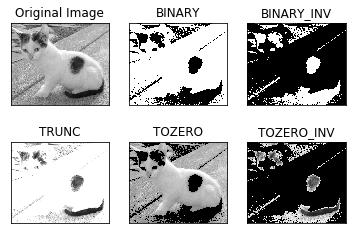

In [18]:
img=cv2.imread('cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# cv_show(img)
# cv_show(img_gray)

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [45]:
# 均值滤波
# 简单的平均卷积操作
img = cv2.imread('lenaNoise.png')
blur = cv2.blur(img, (3, 3))

cv_show(img, blur)
# plt_show(img, blur)


In [35]:
# 方框滤波
# 基本和均值一样，可以选择归一化
img = cv2.imread('lenaNoise.png')
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  
box2 = cv2.boxFilter(img,-1,(3,3), normalize=False)  
cv_show(img, box,box2)

In [1]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img, (5, 5), 1)  
cv_show(img, aussian)


NameError: name 'cv2' is not defined

In [49]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波
cv_show(img, median)


In [52]:
cv_show(img,box,aussian,median)

### Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。
![title](canny_1.png)
- 2)        计算图像中每个像素点的梯度强度和方向。
![title](canny_2.png)
- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。
![title](canny_3.png)
![title](canny_4.png)
- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。
![title](canny_5.png)
- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

![title](canny_6.png)

In [79]:
img=cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,80,150)
v2=cv2.Canny(img,50,100)
print(v1[:2,:2])

cv_show(img,v1,v2)

# plt_show(img,v1,v2)

[[0 0]
 [0 0]]


In [3]:
img=cv2.imread("car.png",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,80,150)
v2=cv2.Canny(img,50,100)


cv_show(img,v1,v2)
# plt_show(img,v1,v2)

### 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔
![title](Pyramid_1.png)
#### 高斯金字塔：向下采样方法（缩小）

![title](Pyramid_2.png)


#### 高斯金字塔：向上采样方法（放大）
![title](Pyramid_3.png)



In [80]:
img=cv2.imread("AM.png")
up=cv2.pyrUp(img)
down=cv2.pyrDown(img)
up_down=cv2.pyrDown(up)
cv_show(img,up_down)
cv_show(up)
cv_show(down)


#### 拉普拉斯金字塔
![title](Pyramid_4.png)

In [25]:
img=cv2.imread("AM.png")
down=cv2.pyrDown(img)
down_up=cv2.pyrUp(down)
l_1=img-down_up
cv_show(img,down_up,l_1)

### 图像轮廓
#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;**(主要用这个)**

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。
![title](chain.png)
为了更高的准确率，使用二值图像。

返回：新版本返回的是两个值

In [17]:
img = cv2.imread('car.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv_show(img)
cv_show(thresh)

In [19]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#### 绘制轮廓
cv2.drawContours(原图, 轮廓, -1,  轮廓颜色, 轮廓厚度)

In [15]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
cv_show(res)

#### 轮廓特征

In [35]:
cnt = contours[2]
cv2.contourArea(cnt)

11.0

In [31]:
cv2.arcLength(cnt,True)

5.414213538169861

#### 轮廓近似

![title](contours3.png)

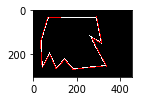

In [55]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show(res)
plt_show(res)  

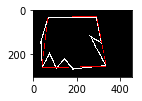

In [54]:
epsilon = 0.05*cv2.arcLength(cnt,True) 
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res)
plt_show(res)

#### 边界矩形

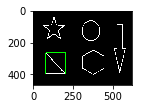

In [57]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt_show(img)

In [58]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.5154317244724715


#### 外接圆

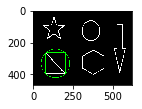

In [60]:
(x,y),radius = cv2.minEnclosingCircle(cnt) 
center = (int(x),int(y)) 
radius = int(radius) 
img = cv2.circle(img,center,radius,(0,255,0),2)
plt_show(img)

待续ing